# Capstone Project Write Up

## Problem Statement and Summary of Key results

The goal of this challenge is to to predict 6 weeks of daily sales for 1,115 stores located across Germany, based on the provided data. The user is given two sets of data (that can be easily merged together) that contain a wealth of information about each store, e.g. promotions, competitors, school and state holidays, seasonality, and locality. 

The key results are as follows:

1) One can make a machine learning simple model that **predicts the sales of the Rossmann stores with a 12.6% error**. Interestingly, the model makes use of only a few of the features provided in the dataset. The model can therefore be implemented in AWS and easily accessed by store managers to accurately forecast sales.

2) Our data analysis shows that **promotions strongly drive sales**, by both increasing the number of customers (20%) and their expenditure (15%). This information might be used to further increase sales (especially in those stores and dates when sales are low), by a more targeted use of promotions.

3) Of the few stores open on Sunday, about half make very low sales. We think these are stores situated in rural areas and we suggest to use this information to close down those shops on Sunday or, at least, to device ways of making more sales (promotions?). 

## Data Exploration

In this competition, the user is given a wealth of data. There are two data sets:

- A historical dataset that includes the sale of each store over the past two years together with some other information about promotions, holidays, dates, etc. Note that each store is identified with a unique ID #.

- A second dateset that contains store-specific information, such as its assortment, its competitors, the types and dates of promotions, etc.

A full data exploration can be found in the DataExploration iPython notebook in my GitHub account. Here I only show some of the key findings, summarized in a few figures below.






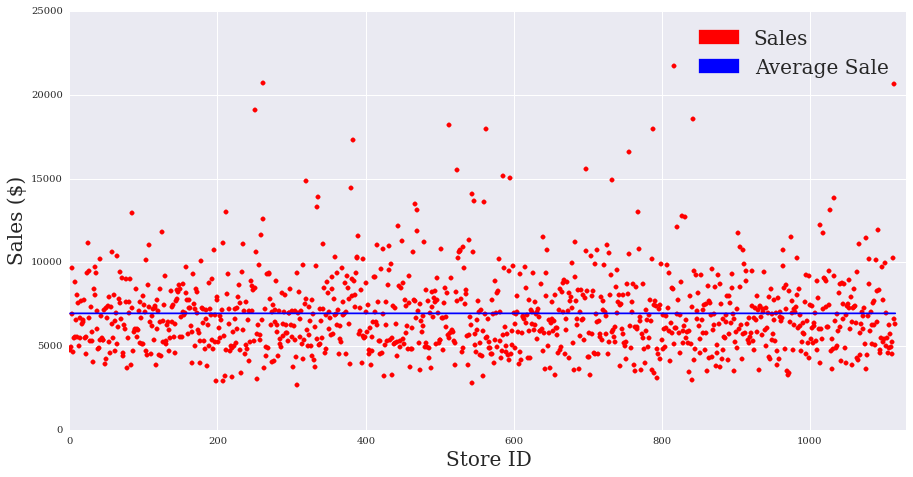

6955.51429076


In [24]:
plt.figure(figsize=(15,7.5))
y = concat.groupby('Store')['Sales'].mean()
x = concat.groupby(['Store'])['Store'].mean()
ave = [concat['Sales'].mean()]*1115
plt.scatter(x, y, color = 'red')
plt.plot(x, ave, color = 'blue')
plt.xlabel('Store ID', fontsize=20)
plt.ylabel('Sales ($)', fontsize=20)
red_patch = mpatches.Patch(color='red', label='Sales')
blue_patch = mpatches.Patch(color='blue', label='Average Sale')
plt.legend(handles=[red_patch, blue_patch],prop={'size':20})
#pylab.rc('font', family='serif', size=10)
pylab.xlim([0,1130])
plt.show()
print(ave[0])

#### Average sales can differ significantly from store to store
The above plot shows the average sale vs the store ID. One can see that there is a significant number of outliers, with sales > \$15,000 (the average is ~\$7,000). Similarly, there are many stores with very low sales (< \$4,000). The store ID is therefore a very important feature that should be used when predicting sales.

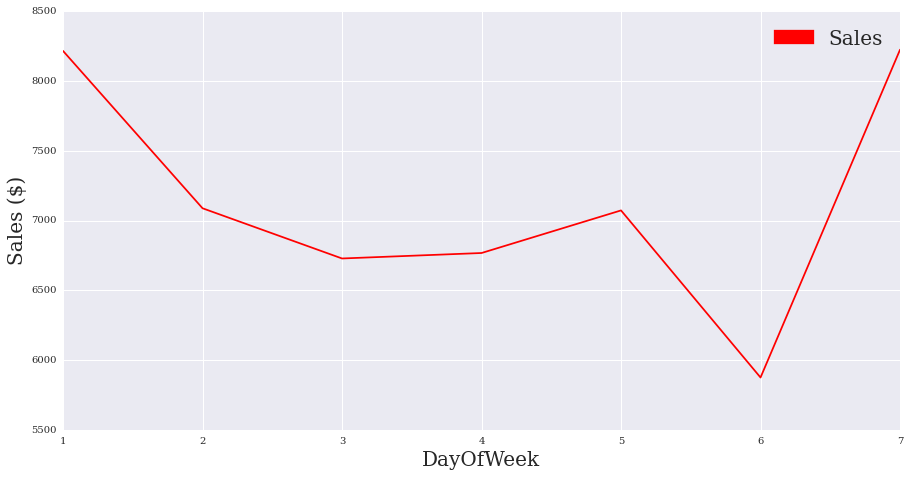

In [25]:
plt.figure(figsize=(15,7.5))
y = concat.groupby('DayOfWeek')['Sales'].mean()
x = concat.groupby(['DayOfWeek'])['DayOfWeek'].mean()
plt.plot(x, y, color = 'red', label = 'Sales')
plt.xlabel('DayOfWeek', fontsize=20)
plt.ylabel('Sales ($)', fontsize=20)
red_patch = mpatches.Patch(color='red', label='Sales')
plt.legend(handles=[red_patch],prop={'size':20})
pylab.xlim([1,7])
plt.show()

### Sales depend strongly on the day of the week
One can see a **strong** dependence of sales on the day of the week. Indeed, Monday and Sunday are the days when sales are highest (> \$8,000) while Saturday is the worst (< \$6,000). Note that the difference is significant, with sales changing by as much as almost 40%! The day of the week is therefore a very important feature that will also have to be included in our model.

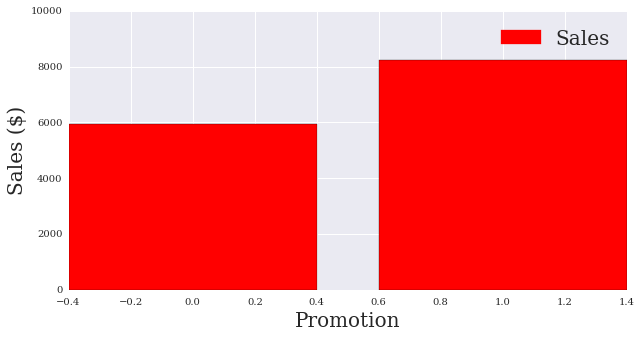

In [30]:
plt.figure(figsize=(10,5))
y = concat.groupby('Promo')['Sales'].mean() 
x = concat.groupby(['Promo'])['Promo'].mean() -0.4
plt.bar(x, y, color = 'red', label = 'Sales')
plt.xlabel('Promotion', fontsize=20)
plt.ylabel('Sales ($)', fontsize=20)
red_patch = mpatches.Patch(color='red', label='Sales')
plt.ylim([0,10000])
plt.legend(handles=[red_patch],prop={'size':20})
plt.show()

### Promotions increase sales by 30%
Promotions drive up sales significantly. Indeed, we find that when a store is running a promotion, this increases *both* the number of clients (by 20%) and their average expenditure (by ~15%). This is very important both for our predictive model and, more generally, because it quantifies the impact of promotions on sales. 

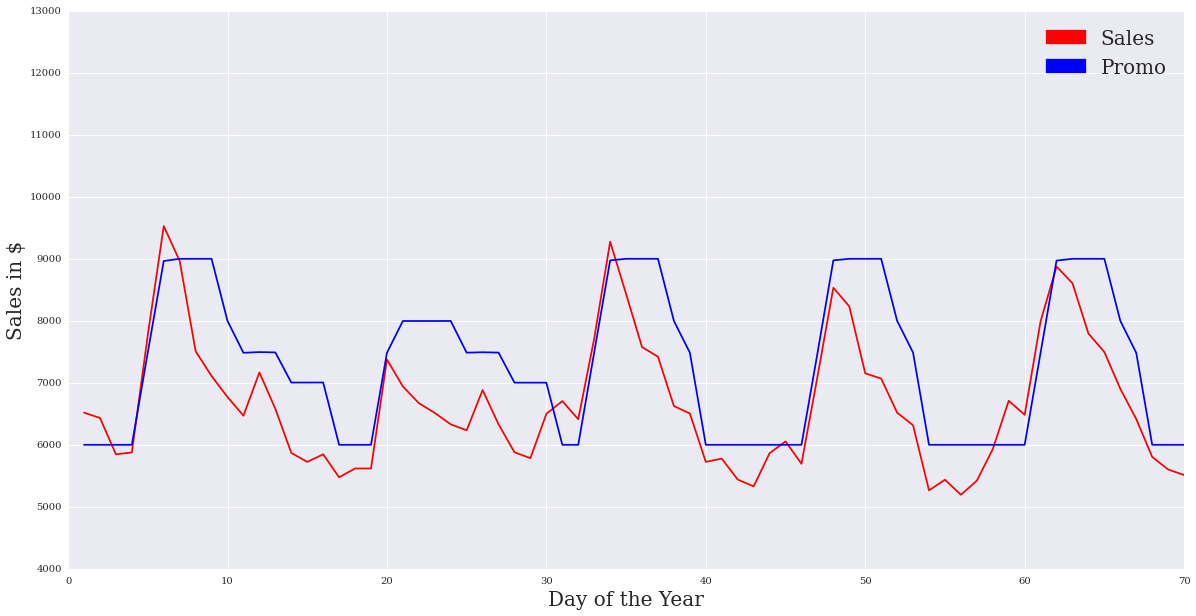

In [32]:
concat['Date3'] = pd.to_datetime(concat['Date']).dt.dayofyear
plt.figure(figsize=(20,10))
y = concat.groupby(['Date3'])['Sales'].mean()
z = 6000+3000*concat.groupby(['Date3'])['Promo'].mean()
x = concat.groupby(['Date3'])['Date3'].mean()
plt.plot(x, y, color = 'red', label = 'Sales')
plt.plot(x, z, color = 'blue')
plt.xlabel('Day of the Year', fontsize=20)
plt.ylabel('Sales in $', fontsize=20)
red_patch = mpatches.Patch(color='red', label='Sales')
blue_patch = mpatches.Patch(color='blue', label='Promo')
plt.legend(handles=[red_patch, blue_patch],prop={'size':20})
pylab.xlim([0,70])
plt.show()

### Promotions explain the oscillations observed in the sales
The plot above shows the average sale vs the day of the year (red curve). One can see that there are some clear oscillations, with a periodicty that is not 1 week (and therefore cannot be explained by the trend observed above). If one plots the promo variable on top of the sales (we have rescaled it to make our point more clear), one can see that there is a clear and strong correlation between these two variables.

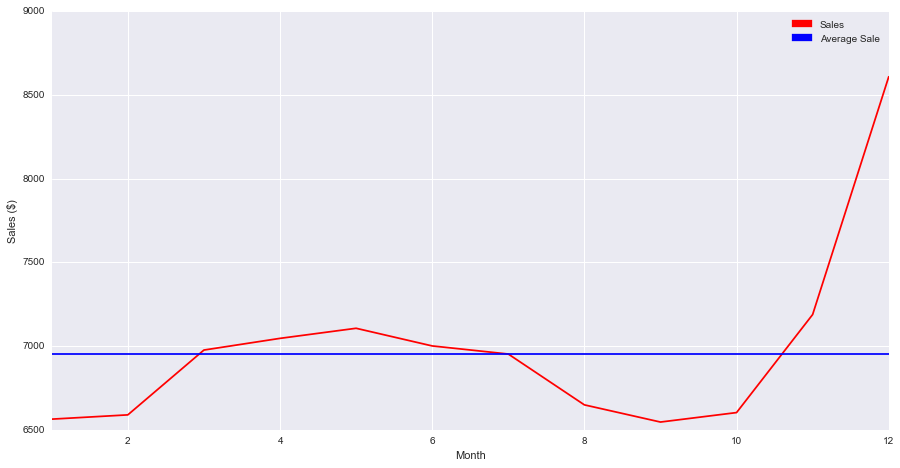

In [11]:
plt.figure(figsize=(15,7.5))
y = concat.groupby('Date2')['Sales'].mean()
x = concat.groupby(['Date2'])['Date2'].mean()
z = [data['Sales'].mean()] * 12
plt.plot(x, y, color = 'red', label = 'Sales')
plt.plot(x, z, color = 'blue', label = 'Average Sales')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
red_patch = mpatches.Patch(color='red', label='Sales')
blue_patch = mpatches.Patch(color='blue', label='Average Sale')
plt.legend(handles=[red_patch, blue_patch])
pylab.xlim([1,12])
plt.show()


### Sales show seasonality
Not surprisingly, if one plots the average sale vs the month of the year, a clear trend is observed. Sales are highest in December (probably because of Christmas) and lowest in January and during the summer.

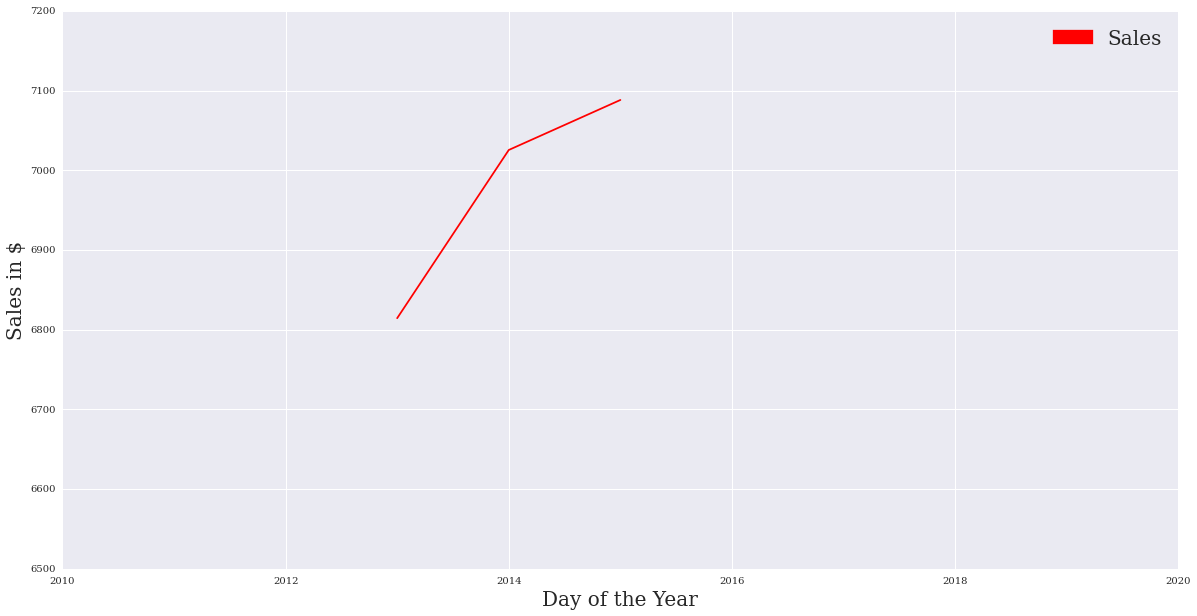

Year
2013    6814.392025
2014    7025.404201
2015    7088.126648
Name: Sales, dtype: float64

In [54]:
concat['Year']=pd.to_datetime(concat['Date']).dt.year
ser = concat.groupby('Year')['Sales'].mean()

plt.figure(figsize=(20,10))
y = ser
x = [2013, 2014, 2015]
plt.plot(x, y, color = 'red', label = 'Sales')
plt.xlabel('Day of the Year', fontsize=20)
plt.ylabel('Sales in $', fontsize=20)
red_patch = mpatches.Patch(color='red', label='Sales')
plt.legend(handles=[red_patch],prop={'size':20})
#plt.xticks(np.arange(2012, 2015+1, 0.2))
pylab.xlim([2010,2020])
pylab.ylim([6500,7200])
plt.show()

ser

### Average sales grow each year
The yearly revenue of the Rossmann stores increases every year. Going from 2013 to 2014, one see a 3% growth. This information will be very **important in forecasting future sales**.

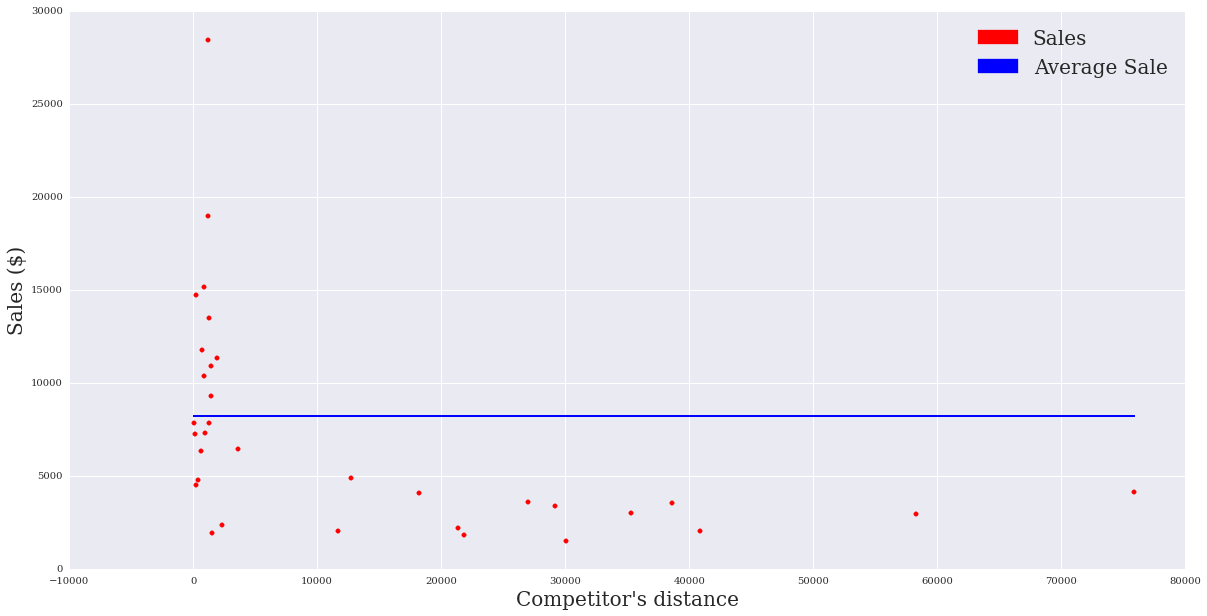

In [64]:
high =  concat[concat.DayOfWeek == 7]
plt.figure(figsize=(20,10))
y = high.groupby('Store')[['Sales']].mean()
x = high.groupby('Store')[['CompetitionDistance']].mean()
ave = 33*[high['Sales'].mean()]
plt.scatter(x,y, color = 'red')
plt.plot(x,ave, color = 'blue')
plt.xlabel('Competitor\'s distance', fontsize=20)
plt.ylabel('Sales ($)', fontsize=20)
red_patch = mpatches.Patch(color='red', label='Sales')
blue_patch = mpatches.Patch(color='blue', label='Average Sale')
plt.legend(handles=[red_patch, blue_patch],prop={'size':20})
plt.show()


### Sunday is a special day

The plot above shows the average sale of those few stores (33 out of 1115) that are open on Sunday. Remember that these stores are in Germany, a country where most stores are closed on Sunday. We note that there is a significant variability in their sales. Indeed, some stores make fantastic sales (\$20,000+), while some other don't (about half of the stores have sales of less than \$5,000). A closer look shows that, somehow counterintuitively, stores with high sales on a Sunday have very close competitors while those with lower sales have competitors that are much further away. A possible reason for this behavior is discussed below.

### Summary of data exploration results

We can summarize the results into three points:

1) Based on my exploratory analysis, there are **only a few features that seem to be good predictors** of the store sale: the store ID, DayOfWeek and Promo plus some other temporal variables I have engineered, such as the month of the year. 

2) Promotions have a significant impact on the store sales, raising both the number of customers and their expenditure.

3) There is significant variability in the sales of those stores that are open on Sunday.

Below, I set up a machine learning model that will make use of this information to predict the sales of the Rossmann stores.


## Machine Learning Model: the nitty gritty details

I have created a python script to perform a ML simulation of the avaialble data. Here I report some of the technical details (data cleaning, algorithm selection, ect). The python code I have written is available on GitHub.

### Data cleaning

The data in the train and test files does not contain any null values (with the exception of one missing value in the test.csv file for the Open variable which I set to 1). A few variables in these files are categorical (e.g. a, b, c, d), these can be easily converted into numerical variables (i.e. 0, 1, 2, 3).

The store.csv file has features that contain plenty of missing values. So far, I have not used these features, since my exploratory analysis did not show any interesting correlation.

### Machine learning algorithms

Due to the categorical nature of the features I intend to use, a decision tree-type algorithm (e.g. decision tree, random forest or bagging regressor) seems most appropriate. In order to use other types of regressors (say linear ones), one would have to encode the data into several dummy variables, using a OneHotEncoder. This becomes very computationall expensive (this is especially true for the store ID, since there are 1115 stores, meaning one will have to create 1115 dummy variables). Furthermore this procedure does not yield better results than decision tree algorithms anyway.

I want to spend a few moments on why a decision tree-type algorithm works best in this case. We note that this is a regression problem in which the explanatory variables are categorical. Therefore, when predicting the sales of a specific store on a certain day, one is faced with a series of questions: which store is this? Which day of the week is it? Is there a promotion running? And so on... In other words, one is faced with a decision tree.

In summary, decision tree, random forest and bagging regressor all seem to work very well and give comparable performance. In most of the discussion below, I will limit myself to a random forest (RF) algorithm, since this is also considered a benchmark algorithm in the Kaggle community. I have also explored different values for some of the RF parameters (n_estimators, min_samples_split, etc.) but found that these have a negligible effect on the model accuracy.


## Results

In the table below, I report the accuracy (this is the $R^2$ as calculated by sklearn on the train dataset!) of my ML model when using different features. In select cases, I also report the Root Mean Square Percentage Error (RMSPE), the metric used for this Kaggle competition calculated from my train dataset, and the Kaggle score (an RMSPE obatined by submitting my prediction for the test dataset to Kaggle.com). One can see that the store ID can already account for almost 60% of the observed variability. The other features (on their own) do a much poorer job. When using more than one feature, the accuracy improves significantly. For instance, combing  Store ID and Promo, gives 75.9% accuracy. Combining four features (Store ID, Promo, DayOfWeek & Month) increases the accuracy to beyond 90%!

|Features Used|Accuracy ($R^2$)| RSMEP  | Kaggle score |
|---|---|
| Store ID   |  57%   | 0.36 |  |
| Promo      |  16.3% |   |  | 
| DayOfWeek  |  5.99%  |  |  | 
| Month      |  1.94%  | 0.56 |  |
| Store ID & Promo | 75.9% | 0.27 | 0.179 |
|Store ID, Promo, DayOfWeek| 85.5%| 0.22 | 0.139 |
|Store ID, Promo, DayOfWeek & Year| **87.0%**| **0.20** | **0.126** |
|Store ID, Promo, DayOfWeek & Month| 90.2%| 0.17 |0.155 |
|Store ID, Promo, DayOfWeek, Month & Year| 92.9%| 0.14 | 0.185 |

The results shown above seem very promising. However, there are also a few caveats. First of all, there is some variability between the RSMEP calculated from my train data and those of the Kaggle submission. Most importantly (and somehow frustratingly), **adding more features does not always improve my prediction**! This is true of the month feature and is somehow surprising, especially if one considers that the test dataset contains data from August and September only, i.e. those two months when sales are significantly below the yearly average (see figure above). This might be because, while the historical average shows a clear dip in the summer months, different years show different trends and the dip only happended in 2013. 



## Client Recommendations

Based on the above analysis, it seems that one can reliably forecast the sales of the Rossmann stores by simply knowing the store ID, day of week and promo features. This model yields a Root Mean Squared Percentage Error of ~12.6%, which we think is pretty good. 

Based on our results (both here and the exploratory data analysis), we make three recommendations to the Rossmann stores management.

1) To upload this model on Amazon Web Services (or similar) and teach all their store managers how to use it. Note that this model combines a good accuracy (12.6% error) with simplicity (all the store managers have to input are the store ID, time period and whether they intend to run a promotion or not).

2) A key result of the exploratory analysis is that promotions drive sales very strongly! This is achieved by both increasing the number of clients (by 20%) and their average expenditure (by ~15%). This information might be used to further increase sales, by a more targeted use of promotions. 

3) Interestingly, there is a significant variability in the sales of those few stores that are open on a Sunday. Indeed, some stores make fantastic sales (\$20,000+), while some other don't (about half of the stores have sales of less than \$5,000). A closer look shows that, somehow counterintuitively, stores with high sales on a Sunday have very close competitors while those with lower sales have competitors that are much further away. This might be because the stores with high sales are in highly urban areas with plenty of customers, while those with low sales might be in rural areas with fewer customers. One could use this information to close down those shops that make little revenue on Sundays or, at least, to device ways of making more sales (promotions?). 



## Future Work

The results shown above are already very promising and provide useful insights for Rossmann. However, here we want to discuss possible limitations of the analysis and suggest future work to further optimize our model.

One limitation of the current analysis is that it does make much use of temporal information to forecast sales. Indeed, the only real temporal feature in our model is the year (the day of week does not really count, since this does not change with time). Our model therefore simply takes into account that sales grow by 3% at an annual rate (this is the growth rate observed in the data). Clearly, one could use more sofisticated approaches based on time series forecasting that predict future values, based on previously observed ones. Such an analysis has the potential of predicting future sales to an even higher precision than the one obtained here and, in particular, it might be more accurate in case where external events might affect sales strongly (e.g a natural disaster, financial crisis, etc.).



In [2]:
%pylab inline
import csv as csv 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math
import datetime
from datetime import datetime
import seaborn
from time import time

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Reads the train and store data sets and merges them using Store column
data = pd.DataFrame.from_csv(open('/Users/dadda/Dropbox (MIT)/Kaggle Competitions/RSS/train.csv', 'rb',), index_col=None) 
extra_data = pd.DataFrame.from_csv(open('/Users/dadda/Dropbox (MIT)/Kaggle Competitions/RSS/store.csv', 'rb',), index_col=None) 
data = data[data.Open == 1]
concat = pd.merge(data, extra_data, on = 'Store')
test = pd.DataFrame.from_csv('/Users/dadda/Dropbox (MIT)/Kaggle Competitions/RSS/test.csv', index_col=None)


//anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [4]:
concat['Date2'] = pd.to_datetime(concat['Date']).dt.month
concat['StateHoliday2'] = concat['StateHoliday'].map( {'a': 1, 'b': 2, 'c': 3, '0': 0, 0:0} ).astype(int)
concat['StoreType2'] = concat['StoreType'].map( {'a': 1, 'b': 2, 'c': 3, 'd': 4} ).astype(int)
concat['Assortment2'] = concat['Assortment'].map( {'a': 1, 'b': 2, 'c': 3, 'd': 4} ).astype(int)